o	Implement Regularization, <br>o	Dropouts <br>o	Improve performance of the learning algorithms<br>o	Implement L2 normalization,<br>o	Frobenius norm


In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam



In [2]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)


# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


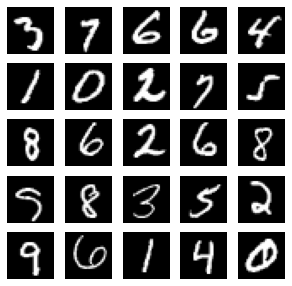

In [3]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model


In [5]:
num_labels = len(np.unique(y_train))
num_labels

10

In [6]:
# convert to one-hot vector

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
image_size = x_train.shape[1]# size of 1 image is 28
input_size = image_size * image_size
input_size

784

In [8]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [9]:
x_train.shape

(60000, 784)

In [10]:
# network parameters
batch_size = 128
hidden_units = 256


### Regularizers L2


In [11]:
from keras.regularizers import l2

# model is a 3-layer MLP with ReLU and dropout after each layer
mode2 = Sequential()
mode2.add(Dense(hidden_units,kernel_regularizer=l2(0.001), input_dim=input_size))
mode2.add(Dropout(0.2))
mode2.add(Activation('relu'))

mode2.add(Dense(hidden_units,kernel_regularizer=l2(0.001),))
mode2.add(Dropout(0.1))
mode2.add(Activation('relu'))

mode2.add(Dense(num_labels,kernel_regularizer=l2(0.001),))
mode2.add(Activation('softmax'))


In [12]:
mode2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [13]:
mode2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])


In [14]:
history=mode2.fit(x_train, y_train, epochs=20,validation_split=0.25, batch_size=batch_size)

Epoch 1/20
352/352 [==============================] - 2s 4ms/step - loss: 0.7535 - accuracy: 0.8944 - val_loss: 0.4611 - val_accuracy: 0.9517
Epoch 2/20
352/352 [==============================] - 1s 4ms/step - loss: 0.4140 - accuracy: 0.9497 - val_loss: 0.3527 - val_accuracy: 0.9583
Epoch 3/20
352/352 [==============================] - 1s 4ms/step - loss: 0.3265 - accuracy: 0.9599 - val_loss: 0.3032 - val_accuracy: 0.9632
Epoch 4/20
352/352 [==============================] - 1s 4ms/step - loss: 0.2907 - accuracy: 0.9637 - val_loss: 0.2753 - val_accuracy: 0.9666
Epoch 5/20
352/352 [==============================] - 1s 4ms/step - loss: 0.2725 - accuracy: 0.9655 - val_loss: 0.2604 - val_accuracy: 0.9691
Epoch 6/20
352/352 [==============================] - 1s 4ms/step - loss: 0.2647 - accuracy: 0.9681 - val_loss: 0.2544 - val_accuracy: 0.9684
Epoch 7/20
352/352 [==============================] - 1s 4ms/step - loss: 0.2592 - accuracy: 0.9684 - val_loss: 0.2551 - val_accuracy: 0.9690
Epoch 

In [15]:
loss, acc = mode2.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 1ms/step - loss: 0.2400 - accuracy: 0.9715

Test accuracy: 97.1%


In [16]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

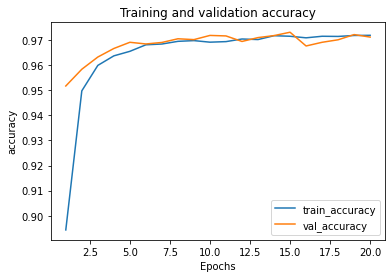

In [17]:
plot_metric(history, 'accuracy')

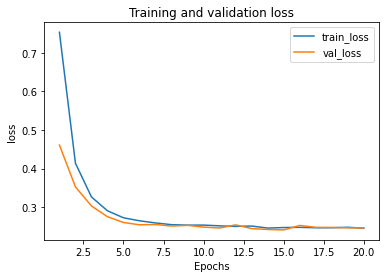

In [18]:
plot_metric(history, 'loss')

### Regularizers L1


In [19]:
from keras.regularizers import l1

# model is a 3-layer MLP with ReLU and dropout after each layer
mode1 = Sequential()
mode1.add(Dense(hidden_units,kernel_regularizer=l1(0.001), input_dim=input_size))
mode1.add(Dropout(0.2))
mode1.add(Activation('relu'))

mode1.add(Dense(hidden_units,kernel_regularizer=l1(0.001),))
mode1.add(Dropout(0.1))
mode1.add(Activation('relu'))


mode1.add(Dense(num_labels,kernel_regularizer=l1(0.001),))
mode1.add(Activation('softmax'))

In [20]:
mode1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [21]:
mode1.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])


In [22]:
history2=mode1.fit(x_train, y_train, epochs=20,validation_split=0.25, batch_size=batch_size)


Epoch 1/20
352/352 [==============================] - 2s 4ms/step - loss: 3.0580 - accuracy: 0.8442 - val_loss: 1.2844 - val_accuracy: 0.8982
Epoch 2/20
352/352 [==============================] - 1s 4ms/step - loss: 1.1893 - accuracy: 0.8820 - val_loss: 1.0131 - val_accuracy: 0.9137
Epoch 3/20
352/352 [==============================] - 1s 4ms/step - loss: 1.0271 - accuracy: 0.8917 - val_loss: 0.9015 - val_accuracy: 0.9217
Epoch 4/20
352/352 [==============================] - 1s 4ms/step - loss: 0.9402 - accuracy: 0.8988 - val_loss: 0.8186 - val_accuracy: 0.9295
Epoch 5/20
352/352 [==============================] - 1s 4ms/step - loss: 0.8895 - accuracy: 0.9020 - val_loss: 0.7858 - val_accuracy: 0.9321
Epoch 6/20
352/352 [==============================] - 1s 4ms/step - loss: 0.8541 - accuracy: 0.9052 - val_loss: 0.7498 - val_accuracy: 0.9343
Epoch 7/20
352/352 [==============================] - 1s 4ms/step - loss: 0.8279 - accuracy: 0.9068 - val_loss: 0.7285 - val_accuracy: 0.9393
Epoch 

In [23]:
loss, acc = mode1.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.9502

Test accuracy: 95.0%


In [24]:
def plot_metric(history2, metric):
    train_metrics = history2.history[metric]
    val_metrics = history2.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

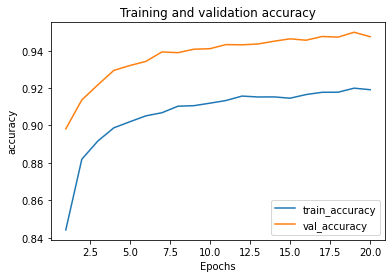

In [25]:
plot_metric(history2, 'accuracy')

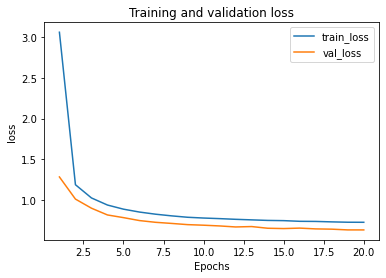

In [26]:
plot_metric(history2, 'loss')

## With Iris Dataset to visualise  decision boundary

In [9]:
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.plotting import plot_decision_regions
from keras.utils import to_categorical

In [3]:
X, y = iris_data()
X = X[:, [2, 3]]

X = standardize(X)

In [4]:
# OneHot encoding
y_onehot = to_categorical(y)

In [5]:
# Create the model
np.random.seed(123)
model = Sequential()
model.add(Dense(8, input_shape=(2,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [6]:
# Configure the model and start training
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.005), metrics=['accuracy'])
history = model.fit(X, y_onehot, epochs=10, batch_size=5, verbose=1, validation_split=0.1)

C:\Users\Pratik\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
27/27 [==============================] - 1s 7ms/step - loss: 1.0407 - accuracy: 0.4667 - val_loss: 0.4368 - val_accuracy: 1.0000
Epoch 2/10
27/27 [==============================] - 0s 2ms/step - loss: 0.9282 - accuracy: 0.4593 - val_loss: 0.2999 - val_accuracy: 1.0000
Epoch 3/10
27/27 [==============================] - 0s 2ms/step - loss: 0.8658 - accuracy: 0.4741 - val_loss: 0.1997 - val_accuracy: 1.0000
Epoch 4/10
27/27 [==============================] - 0s 2ms/step - loss: 0.8143 - accuracy: 0.5185 - val_loss: 0.1492 - val_accuracy: 1.0000
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 0.7676 - accuracy: 0.5481 - val_loss: 0.1071 - val_accuracy: 1.0000
Epoch 6/10
27/27 [==============================] - 0s 2ms/step - loss: 0.7261 - accuracy: 0.5704 - val_loss: 0.0960 - val_accuracy: 1.0000
Epoch 7/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.7852 - val_loss: 0.0719 - val_accuracy: 1.0000
Epoch 8/10
27/27 [==

In [7]:
# Wrap keras model
model_no_ohe = Onehot2Int(model)



3888/3888 [==============================] - 2s 512us/step


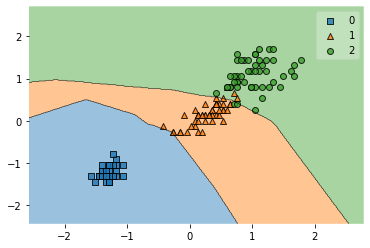

In [8]:
# Plot decision boundary
plot_decision_regions(X, y, clf=model_no_ohe)
plt.show()
